### Context
The ability to differentiate an X-ray image so effectively which can mean better diagnosis.

### Objective
To implement the computer vision techniques learnt as a part of the course.

### Data Description
The dataset comprises 3 classes: COVID-19, Viral Pneumonia, and Normal. The goal of the project is 
to create a classifier capable of determining the class of the X-ray image.

The given dataset:
- testimage.npy
- testLabels.csv
- trainimage.npy
- trainLabels.csv

### Import Libraries

In [5]:
import os
import numpy as np # MATRIX OPERATIONS
import pandas as pd # EFFICIENT DATA STRUCTURES
import matplotlib.pyplot as plt # GRAPHING AND VISUALIZATIONS
import math # MATHEMATICAL OPERATIONS
import cv2 # IMAGE PROCESSING - OPENCV
from glob import glob # FILE OPERATIONS
import itertools
import seaborn as sns
import numpy as np
# KERAS AND SKLEARN MODULES
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,CSVLogger
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# GLOBAL VARIABLES

seed = 7

### Load dataset

In [7]:
### Load the image and label for train and test dataset 
tr_images = np.load('trainimage.npy')
tr_labels = pd.read_csv('trainLabels.csv')
te_images = np.load('testimage.npy')
te_labels = pd.read_csv('testLabels.csv')

### Print shape of the data

In [9]:
#Overview of the dataset
print((tr_images.shape),(tr_labels.shape))
print((te_images.shape),(te_labels.shape))

(251, 128, 128, 3) (251, 1)
(66, 128, 128, 3) (66, 1)


#### Train dataset
- For train images, there are 251 RGB images of shape 128 x 128 each and each image is an RGB image having 3 channels. 
- For train labels, there are 251 labels align with images above.

#### Test dataset
- For test images, there are 66 RGB images of shape 128 x 128 each and each image is an RGB image having 3 channels 
- For test labels, there are 66 labels align with images above.

### Explore the data
    a. print value count of each type of label in training and testing set
    b. find the number of unique labels 

In [101]:
#count of each type of label
count1=tr_labels.value_counts()
count2=te_labels.value_counts()
print(count1,count2)

Label          
Covid              111
Normal              70
Viral Pneumonia     70
dtype: int64 Label          
Covid              26
Normal             20
Viral Pneumonia    20
dtype: int64


#### Observation
- There are correspondingly 320 labels.
- There are 3 unique categories: Viral Pneumonia, covid, normal
- There is no missing values

In [41]:
#find the unique labels in training set
tr_labels['Label'].unique()

array(['Viral Pneumonia', 'Covid', 'Normal'], dtype=object)

- The unique values are Viral Pneumonia, Covid, and Normal

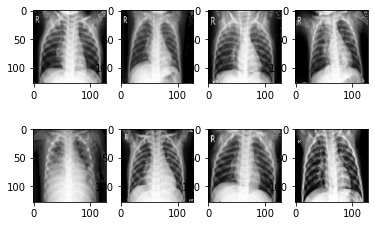

In [12]:
#Visualize some images of train dataset
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(tr_images[i])

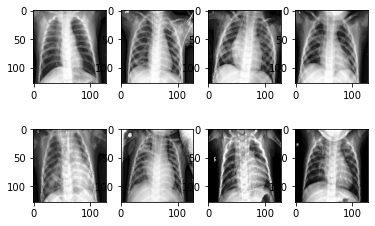

In [13]:
#Visualize some images of test dataset
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(te_images[i])

C:\Users\Sue Hong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2]),
 [Text(0, 0, 'Viral Pneumonia'), Text(1, 0, 'Covid'), Text(2, 0, 'Normal')])

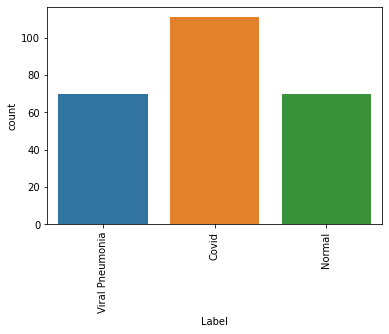

In [14]:
#check the train dataset is imbalanced or not
sns.countplot(tr_labels['Label'])
plt.xticks(rotation='vertical')

C:\Users\Sue Hong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2]),
 [Text(0, 0, 'Viral Pneumonia'), Text(1, 0, 'Covid'), Text(2, 0, 'Normal')])

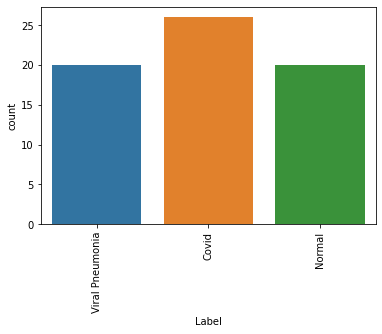

In [15]:
#check the test dataset is imbalanced or not
sns.countplot(te_labels['Label'])
plt.xticks(rotation='vertical')

- As you can see from the above plot, both the train and test dataset are quite balanced. 
- No need to normalize the data since the datatype isnt numeric.

### Data pre-processing
    a. Guassian Blurring using kernel size of (5,5)
    b. visualize data after performing the Gaussian blurring
    c. normalization of data

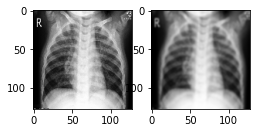

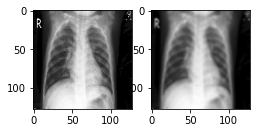

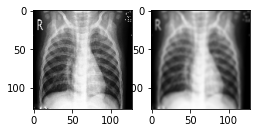

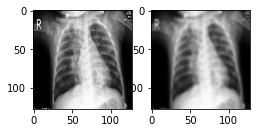

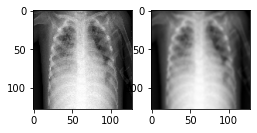

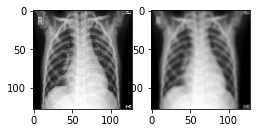

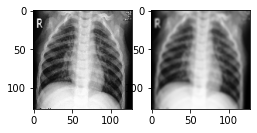

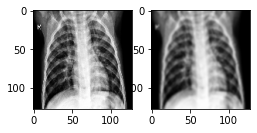

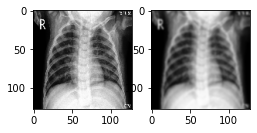

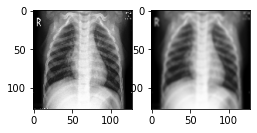

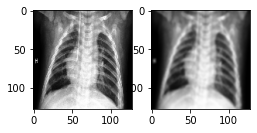

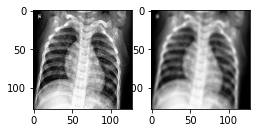

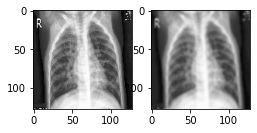

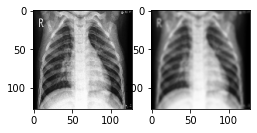

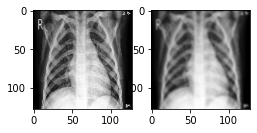

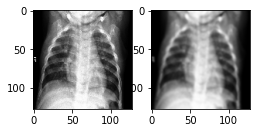

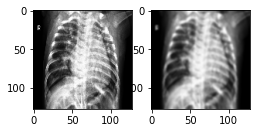

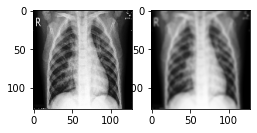

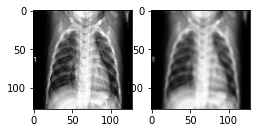

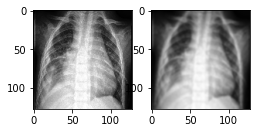

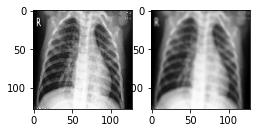

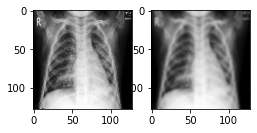

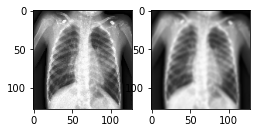

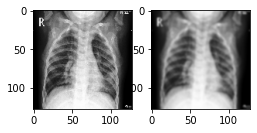

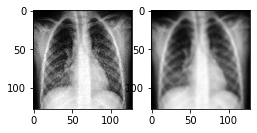

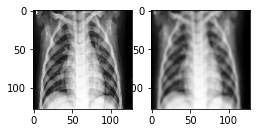

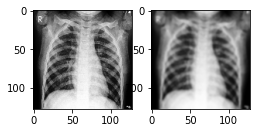

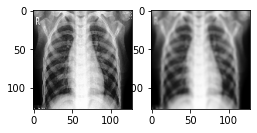

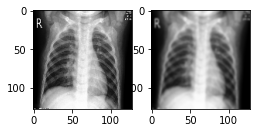

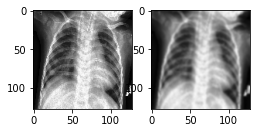

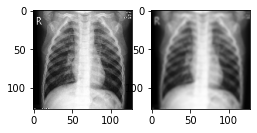

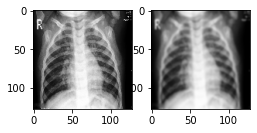

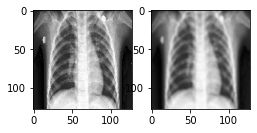

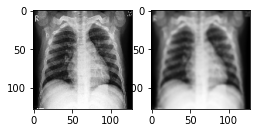

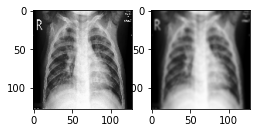

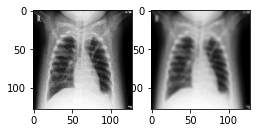

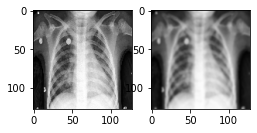

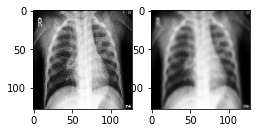

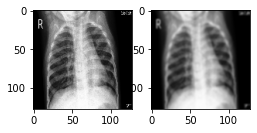

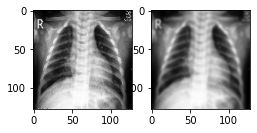

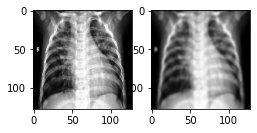

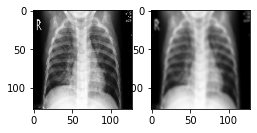

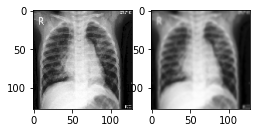

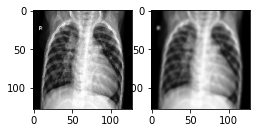

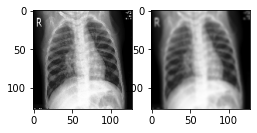

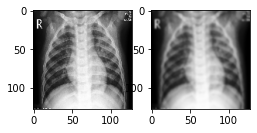

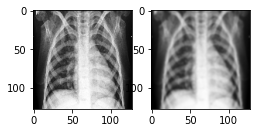

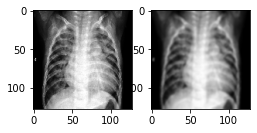

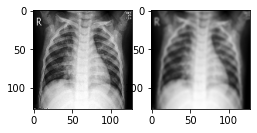

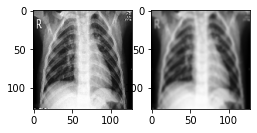

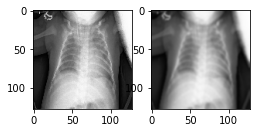

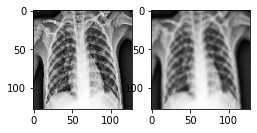

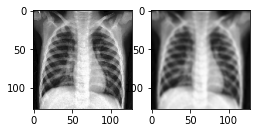

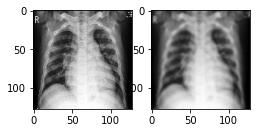

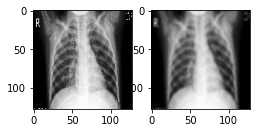

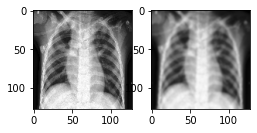

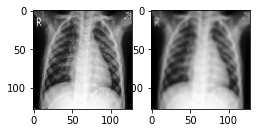

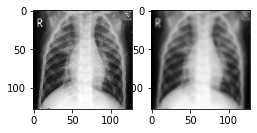

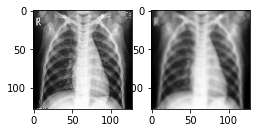

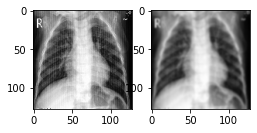

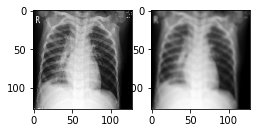

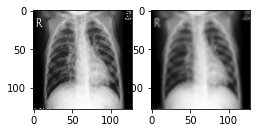

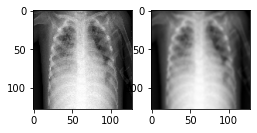

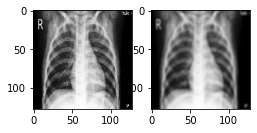

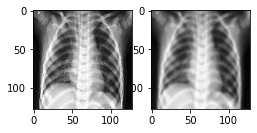

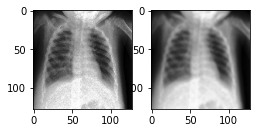

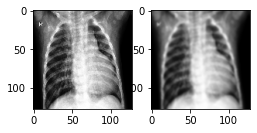

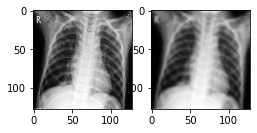

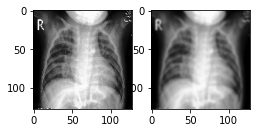

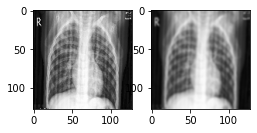

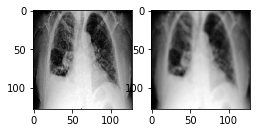

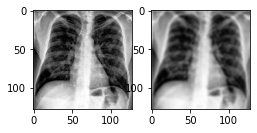

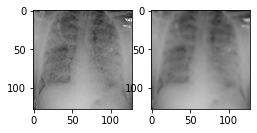

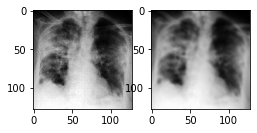

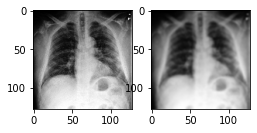

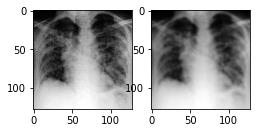

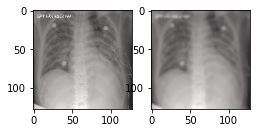

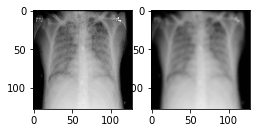

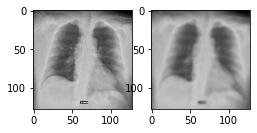

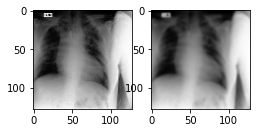

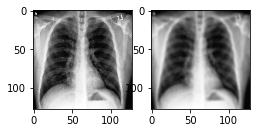

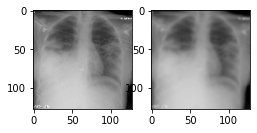

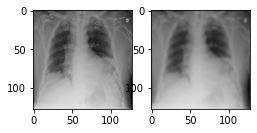

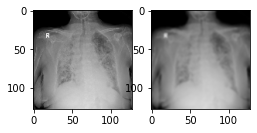

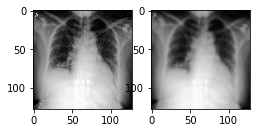

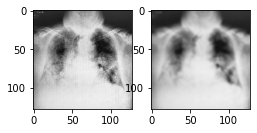

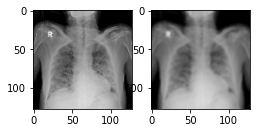

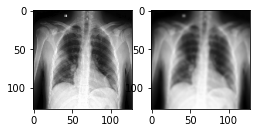

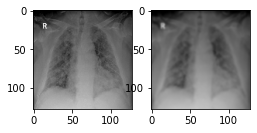

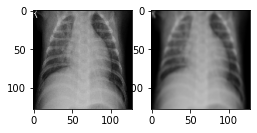

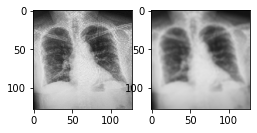

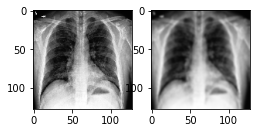

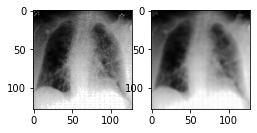

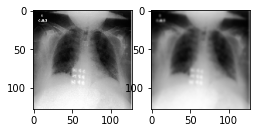

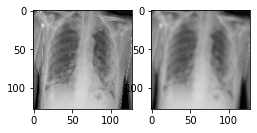

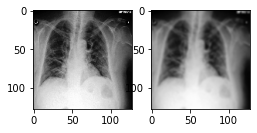

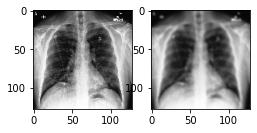

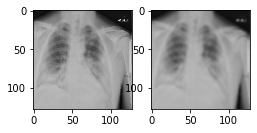

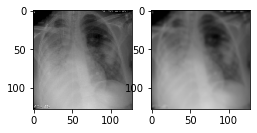

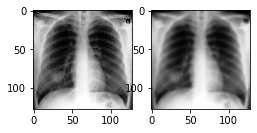

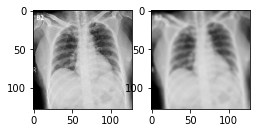

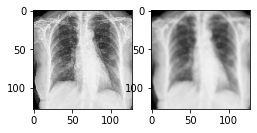

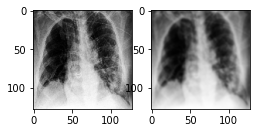

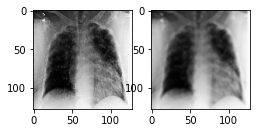

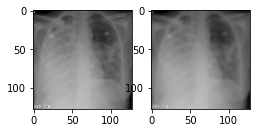

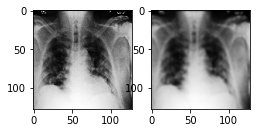

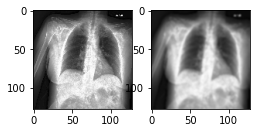

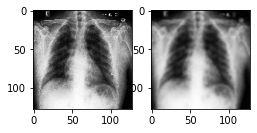

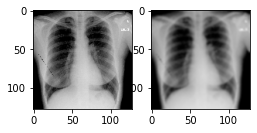

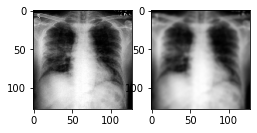

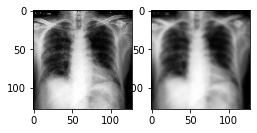

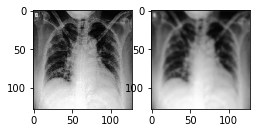

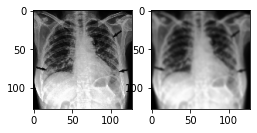

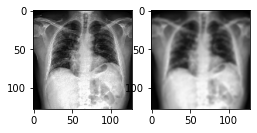

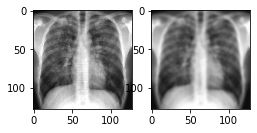

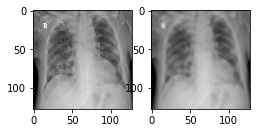

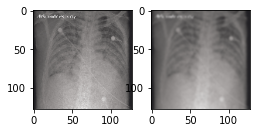

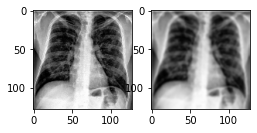

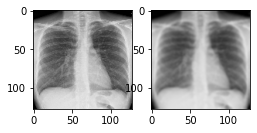

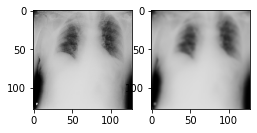

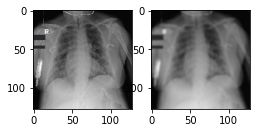

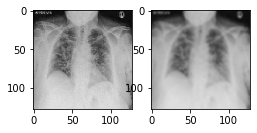

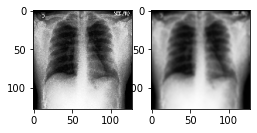

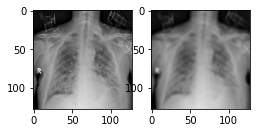

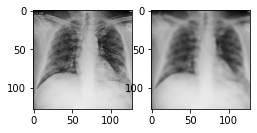

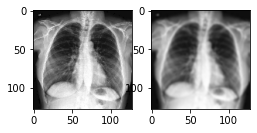

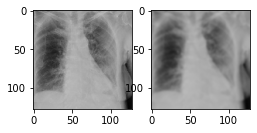

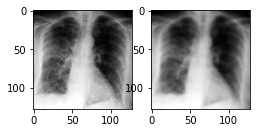

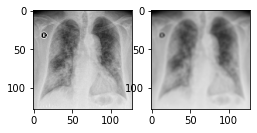

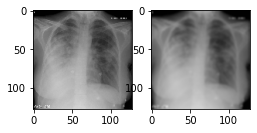

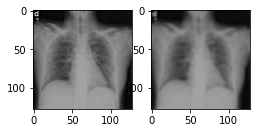

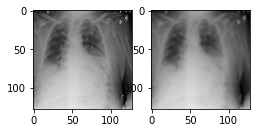

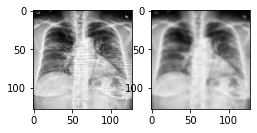

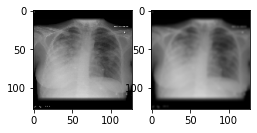

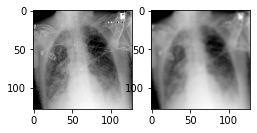

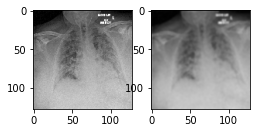

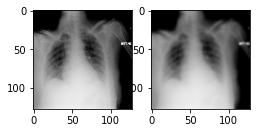

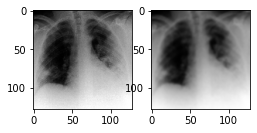

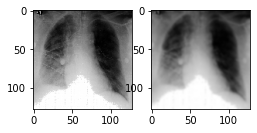

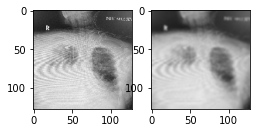

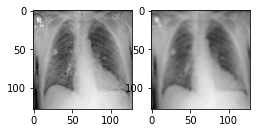

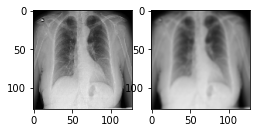

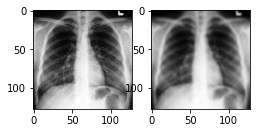

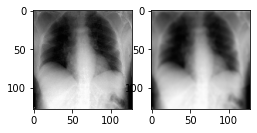

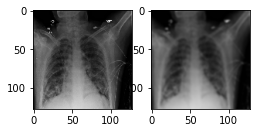

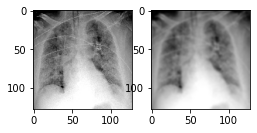

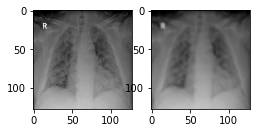

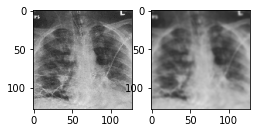

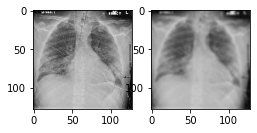

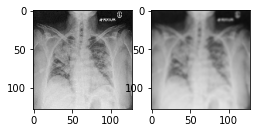

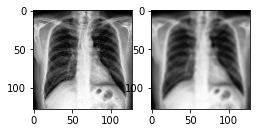

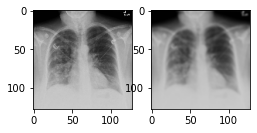

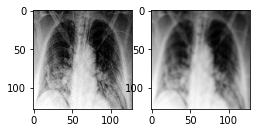

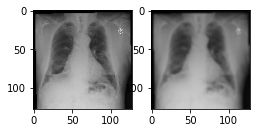

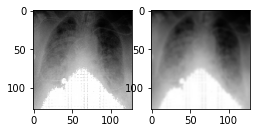

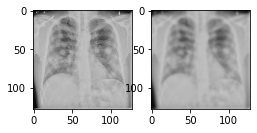

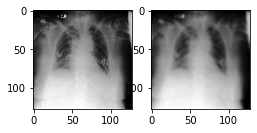

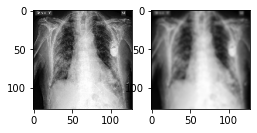

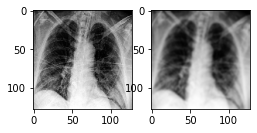

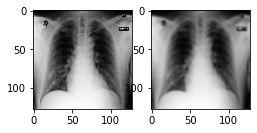

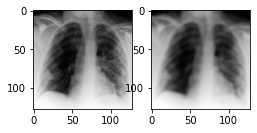

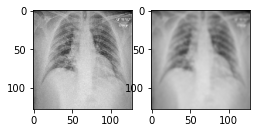

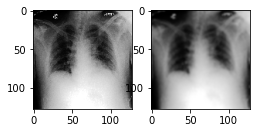

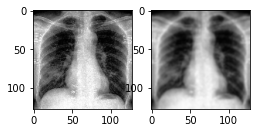

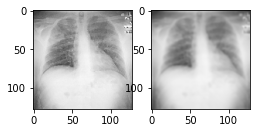

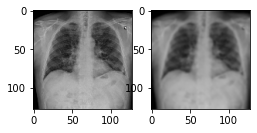

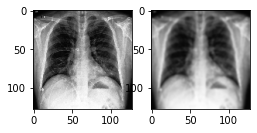

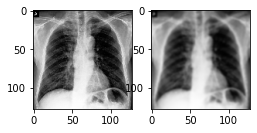

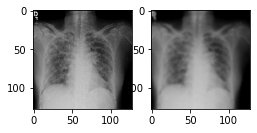

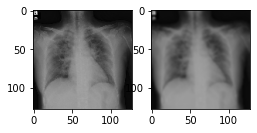

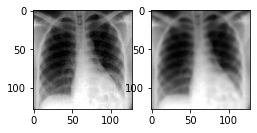

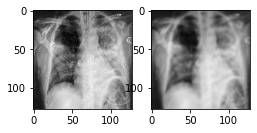

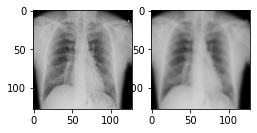

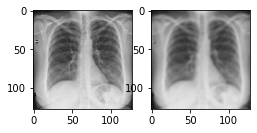

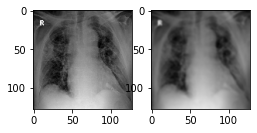

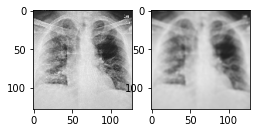

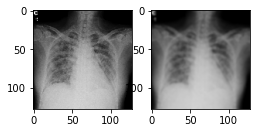

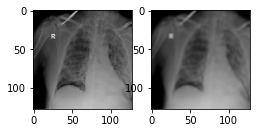

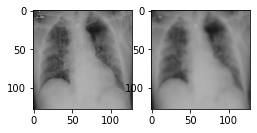

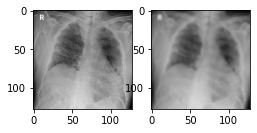

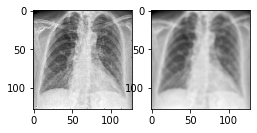

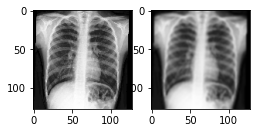

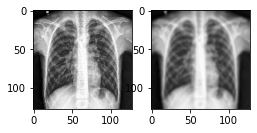

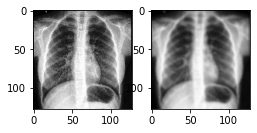

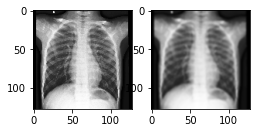

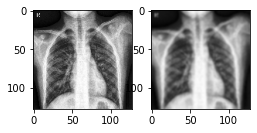

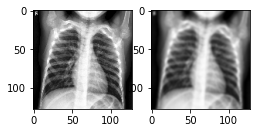

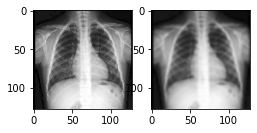

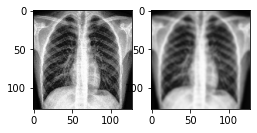

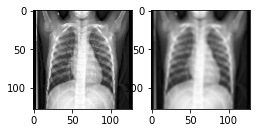

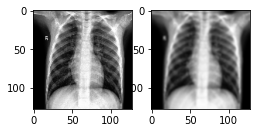

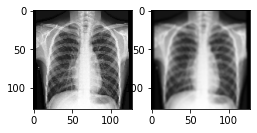

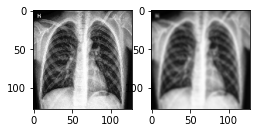

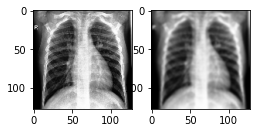

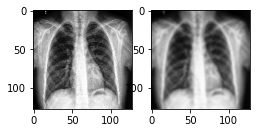

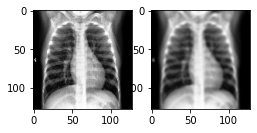

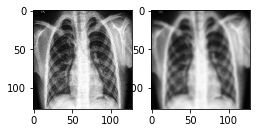

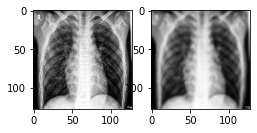

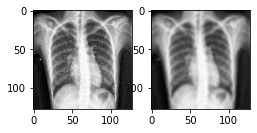

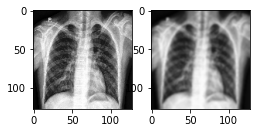

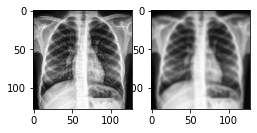

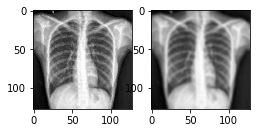

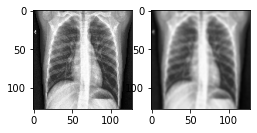

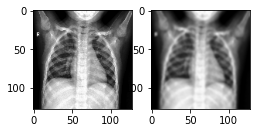

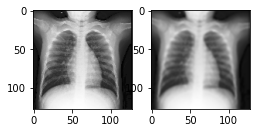

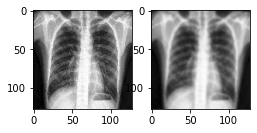

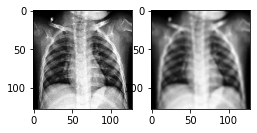

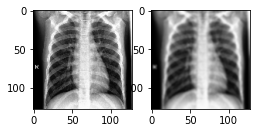

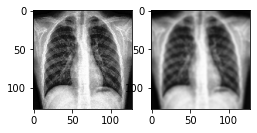

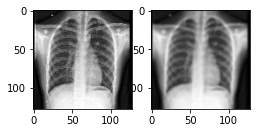

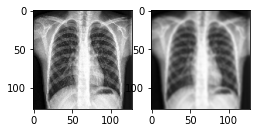

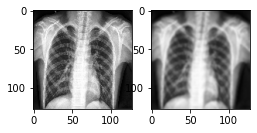

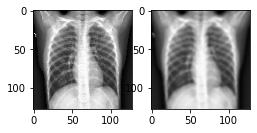

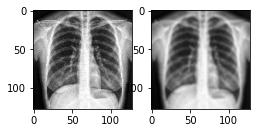

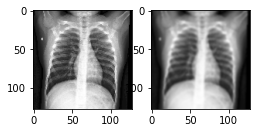

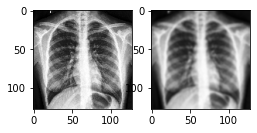

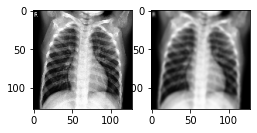

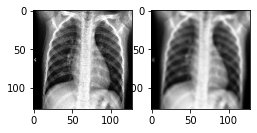

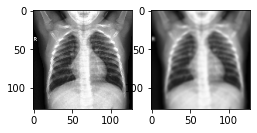

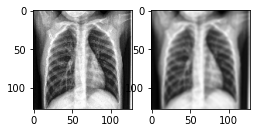

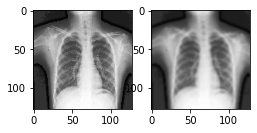

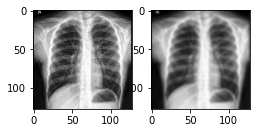

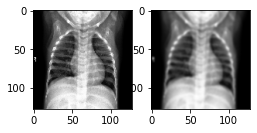

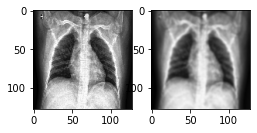

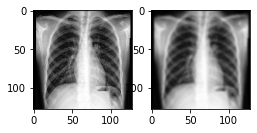

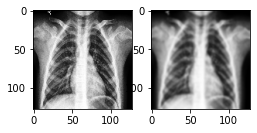

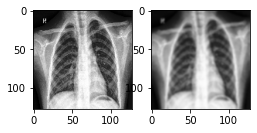

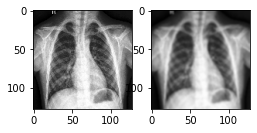

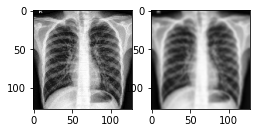

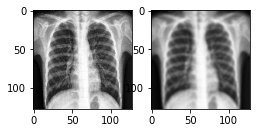

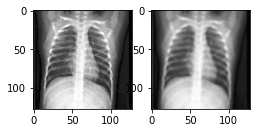

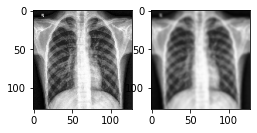

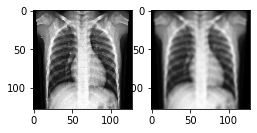

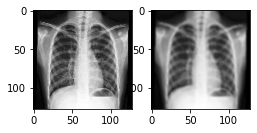

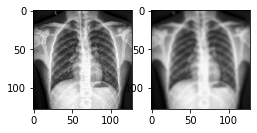

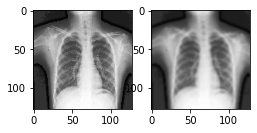

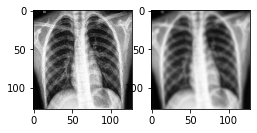

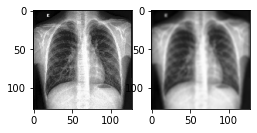

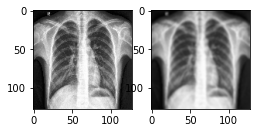

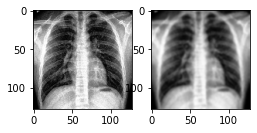

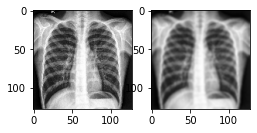

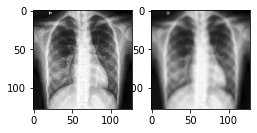

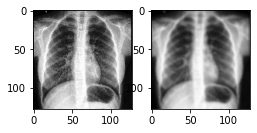

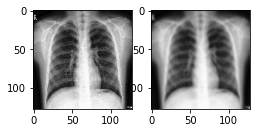

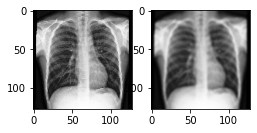

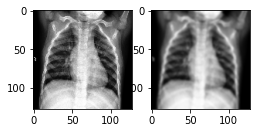

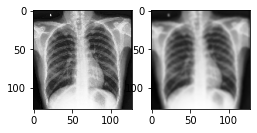

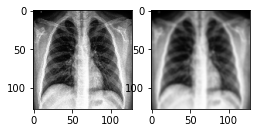

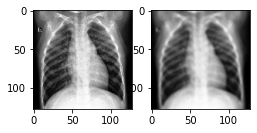

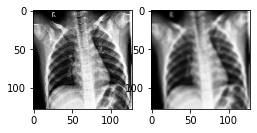

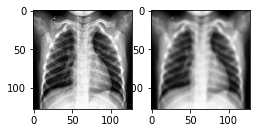

IndexError: list index out of range

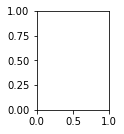

In [30]:
#Perform Guassian Blurring
new_train = []
sets = []; getEx = True
for i in tr_images:
    blurr = cv2.GaussianBlur(i,(5,5),0) #used suggested kernal size (5,5)
    
    if getEx:
        plt.subplot(2,3,1);plt.imshow(i) # ORIGINAL
        plt.subplot(2,3,2);plt.imshow(blurr) # BLURRED
        plt.show()

#visualize the original on the left, blurred image on the right for comparison
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(new_train[i])

### Make data compatible
    a. reshape data into shapes compatible with Keras models
    b. convert labels to one hot vectors

In [51]:
#convert labels to one hot vectors
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(tr_labels)
y

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0,

In [52]:
#check the shape of data and reshape
print(y.shape)
print(tr_labels.shape)

(251, 3)
(251, 1)


In [78]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(tr_labels,y , train_size=0.7, random_state=seed, stratify=y)

In [79]:
#check the slit 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(175, 1)
(175, 3)
(76, 1)
(76, 3)


In [81]:
#check the class proportion for train dataset
pd.DataFrame(y_train.argmax(axis=1)).value_counts()/pd.DataFrame(y_train.argmax(axis=1)).value_counts().sum()

0    0.44
1    0.28
2    0.28
dtype: float64

In [82]:
#check the class proportion for test dataset
pd.DataFrame(y_test.argmax(axis=1)).value_counts()/pd.DataFrame(y_test.argmax(axis=1)).value_counts().sum()

0    0.447368
1    0.276316
2    0.276316
dtype: float64

In [93]:
# Further split 50% of test data set to be used as validation set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=0.5, random_state=0)

In [94]:
# check the shape of the x validation dataset
X_val.shape 

(38, 1)

- The data has been split into 70% training, 15% test and 15% validation.

### Build CNN Model
    a. define layers.
    b. set optimizer and loss function using Adam optimizer and categorical crossentropy.

In [83]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D

# Set the CNN model 
batch_size=None


model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', batch_input_shape = (batch_size,256, 256, 3)))


model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))



model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 256, 256, 32)      2432      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 256, 256, 32)      25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 64)       

In [85]:
#Define optimizer and loss function
from keras.optimizers import RMSprop
import tensorflow as tf

#perform Adam optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

#Compile model with loss as categorical crossentropy
model.compile(opt, loss = "categorical_crossentropy", metrics = ["accuracy"])

### Fit and evaluate model and print confusion matrix

In [87]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=20)

#Add Model Checkpoint callback to the fit function

model_checkpoint =  ModelCheckpoint('basemodel1_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [104]:
# Fit and evaluate the model.
batch_size = 38
history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=50,
                    validation_data=(X_val, y_val),
                    shuffle=True,
                    verbose=0,
                    callbacks=[early_stopping,model_checkpoint])

'history = model.fit(X_train,\n                    y_train,\n                    batch_size=batch_size,\n                    epochs=50,\n                    validation_data=(X_val, y_val),\n                    shuffle=True,\n                    verbose=0,\n                    callbacks=[early_stopping,model_checkpoint])'

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right');

- Based on the learning graph above,the model is generalizing well to the validation set.

In [ ]:
# Evaluate the model.

score = model.evaluate(X_test, y_test, verbose=0, batch_size = 38)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [102]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
result = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)

conf_mat = confusion_matrix(Y_true, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in range(0, 12)],
                  columns = [i for i in range(0, 12)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g');

### Visualize predictions
- Predictions for  x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]

In [ ]:
#perform predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]
plt.figure(figsize=(2,2))
plt.imshow(X_test[2],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model1.predict(X_test[3].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[2]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[3],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model1.predict(X_test[2].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[3]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[33],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model1.predict(X_test[33].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[33]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[36],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model1.predict(X_test[59].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[36]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model1.predict(X_test[36].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[59]))